In [2]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline
import datetime
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('./NFLX.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [4]:
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')
data = pd.DataFrame(df[['Date','Close']])
data=data.reset_index()
data=data.drop('index',axis=1)
data.set_index('Date', inplace=True)
data = data.asfreq('D')
data

,Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


In [5]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")
for i in range(1,7):
    for j in range(1,7):
        model=ARIMA(data['Close'],order=(i,0,j))
        result=model.fit()
        print(f"AIC :{result.aic}, Order Of AR: {i}, Order of MA:{j} ") 

AIC :7798.097967383044, Order Of AR: 1, Order of MA:1 
AIC :7795.827922510797, Order Of AR: 1, Order of MA:2 
AIC :7789.888651144109, Order Of AR: 1, Order of MA:3 
AIC :7783.823436520495, Order Of AR: 1, Order of MA:4 
AIC :7783.979833984085, Order Of AR: 1, Order of MA:5 
AIC :7785.10847284939, Order Of AR: 1, Order of MA:6 
AIC :7798.145852820923, Order Of AR: 2, Order of MA:1 
AIC :7796.387808354501, Order Of AR: 2, Order of MA:2 
AIC :7789.124499964708, Order Of AR: 2, Order of MA:3 
AIC :7784.491635942446, Order Of AR: 2, Order of MA:4 
AIC :7781.189931667615, Order Of AR: 2, Order of MA:5 
AIC :7783.005665131798, Order Of AR: 2, Order of MA:6 
AIC :7793.010315868993, Order Of AR: 3, Order of MA:1 
AIC :7784.503937656414, Order Of AR: 3, Order of MA:2 
AIC :7784.0071047514375, Order Of AR: 3, Order of MA:3 
AIC :7785.991803295166, Order Of AR: 3, Order of MA:4 
AIC :7783.82340329263, Order Of AR: 3, Order of MA:5 
AIC :7785.535737155896, Order Of AR: 3, Order of MA:6 
AIC :7794.7

In [7]:
model=ARIMA(data['Close'],order=(6,1,6))
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1461
Model:                 ARIMA(6, 1, 6)   Log Likelihood               -3870.855
Date:                Mon, 09 Dec 2024   AIC                           7767.710
Time:                        22:54:37   BIC                           7836.430
Sample:                    02-05-2018   HQIC                          7793.345
                         - 02-04-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6847      0.159     -4.320      0.000      -0.995      -0.374
ar.L2         -1.1897      0.200     -5.946      0.000      -1.582      -0.798
ar.L3         -0.5321      0.279     -1.908      0.056      -1.079       0.015
ar.L4         -0.4682      0.260     -1.801      0.072      -0.978       0.041
ar.L5         -0.0009      0.173     -0.005      0.996      -0.339       0.338
ar.L6         -0.2776      0.122     -2.279      0.023      -0.516      -0.039
ma.L1          0.5611      0.162      3.457      0.001       0.243       0.879
ma.L2          0.9945      0.184      5.419      0.000       0.635       1.354
ma.L3          0.2834      0.239      1.188      0.235      -0.184       0.751
ma.L4          0.4702      0.205      2.295      0.022       0.069       0.872
ma.L5         -0.0026      0.131     -0.020      0.984      -0.260       0.255
ma.L6          0.5040      0.101      4.977      0.000       0.306       0.703
sigma2        99.7187      3.930     25.376      0.000      92.017     107.421
===================================================================================
Ljung-Box (L1) (Q):                   4.27   Jarque-Bera (JB):             43635.78
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               2.34   Skew:                            -0.77
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Date'>

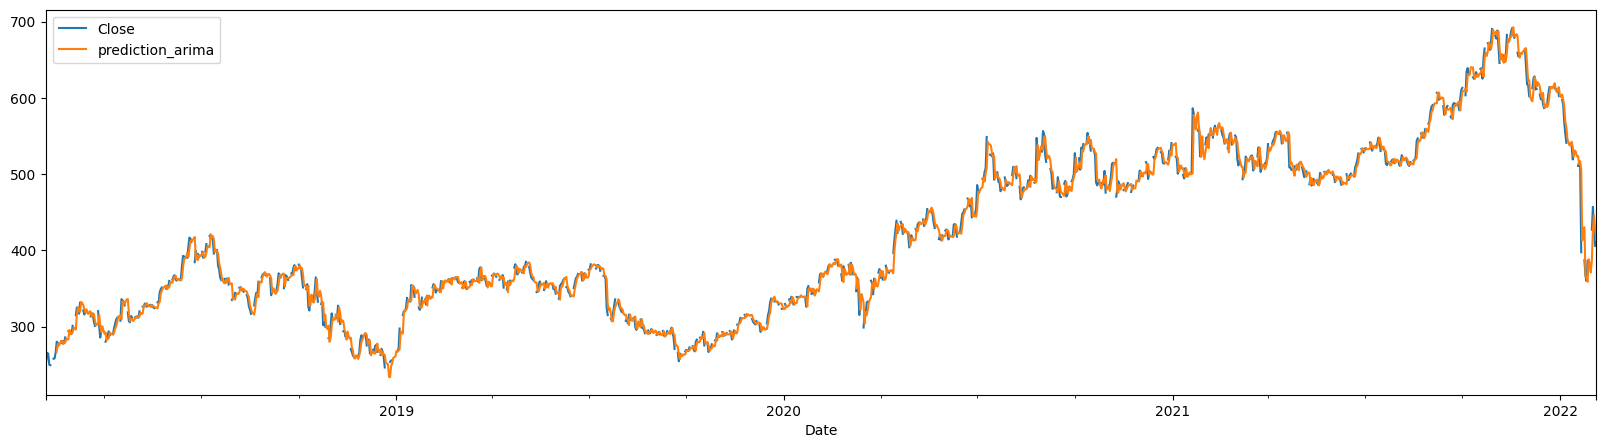

In [9]:
data['prediction_arima']=result.predict(start=10,end=len(data))
data[["Close","prediction_arima"]].plot(figsize=(20,5))